In [292]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
import scipy.signal as signal
import urllib2
import urllib

In [293]:
# Part I 5
# Find the fourier transform of A*cos(f_n*t) + C
# input variables A, C and n(an integer)
# function that outputs cosine function
def cos(A, C, n, L, res):
    t = np.linspace(0, L, res) # L = 2pi
    cos_array = A * np.cos(2 * np.pi * n * t / L) + C # 2 pi n t/L
    return cos_array

def gaussian(A, B, L, res):
    t = np.linspace(0, L, res)
    gauss_array = A * np.exp(-B * (t - L/2)**2)
    return gauss_array

max difference 1.0735327244989678e-14


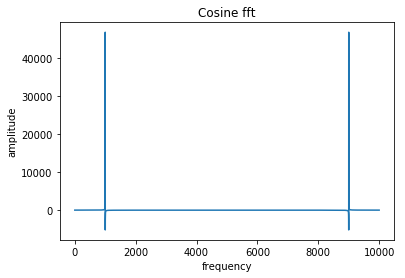

In [354]:
res = 10000 # resolution
L = 2 * np.pi
# cosine functions
# test if the inverse transform returns the original function
cos_array = cos(10, 0, 1000, L, res)
fft_cos = np.fft.fft(cos_array)
#print(fft_cos)
inverse_fft_cos = np.fft.ifft(fft_cos)
# floats have finite position so == might not work
difference = np.abs(inverse_fft_cos - cos_array)
print('max difference ' + str(max(difference)))
# the maximum of the difference is a very small number

# We get 2 "delta" functions as expected 
freq = np.arange(len(cos_array)) # 10 is the interval
plt.plot(freq, np.real(fft_cos))
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Cosine fft')
plt.show()

max difference 2.220568687549407e-16


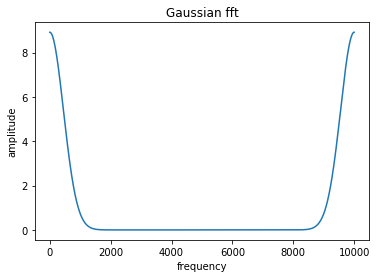

In [353]:
# Gaussian function
gaus_array = gaussian(1, 100000, L, res)
fft_gaus = np.fft.fft(gaus_array)
inverse_fft_gaus = np.fft.ifft(fft_gaus)
# floats have finite position so == might not work
difference = np.abs(inverse_fft_gaus - gaus_array)
print('max difference ' + str(max(difference)))

# we get a gaussian function as expected
freq1 = np.arange(len(gaus_array)) # 10 is the interval
plt.plot(freq1, np.abs(fft_gaus))
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.title('Gaussian fft')
plt.show()

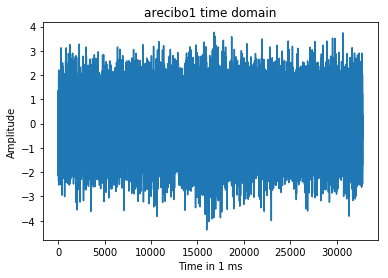

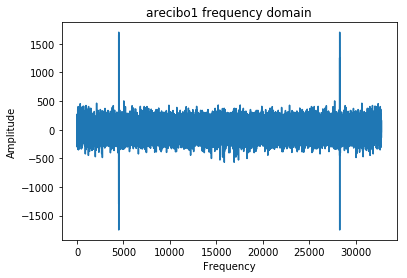

In [352]:
# Part 2 1
# Import from arecibo1
data = np.genfromtxt('arecibo1.txt')
time = np.arange(32768) # 1ms apart
# plot time
plt.plot(time, data)
plt.title('arecibo1 time domain')
plt.xlabel('Time in 1 ms')
plt.ylabel('Amplitude')
plt.show()

# Plot fft
data_fft = np.fft.fft(data)
freq_index = np.arange(32768)
plt.plot(data_fft)
plt.title('arecibo1 frequency domain')
plt.ylabel('Amplitude')
plt.xlabel('Frequency')
plt.show()

# Find first peak
max_amp1 = max(data_fft)
max_ind1 = np.argmax(abs(data_fft))
# freq in rads = 2 * pi * n / L, n = max_ind = 4489, L = 32768 ms
freq_hz1 = max_ind1 / (32678*10**(-3)) # freq in hertz


# Find second peak
max_amp2 = max(data_fft[6000:])
max_ind2 = np.argmax(abs(data_fft[6000:])) # 22279
freq_hz2 = max_ind2 / (32678*10**(-3)) # freq in hertz


7.279572287814657


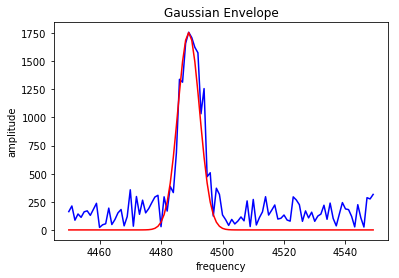

In [348]:
# Part2 2
# Zoom in to the part with the central signal
datasegment = data_fft[4450:4550]
new_freq = np.arange(4450,4550)

# Function to fit the data
fit_func = 0.95 * np.cos(max_ind1 * 2 * np.pi * time / 32768) * np.exp(-0.23*10**(-6) * (time - 32768/2)**2)
#fit_func = 1000*np.exp(-1000 * (time - center_time1)**2)
fit_fft = np.fft.fft(fit_func)
fit_fft_seg = fit_fft[4450:4550]
print(center_time1)

# Plot fft of fit function over data to see if it fits
plt.plot(new_freq, abs(datasegment), 'b')
plt.plot(new_freq, abs(fit_fft_seg), 'r')
plt.title('Gaussian Envelope')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

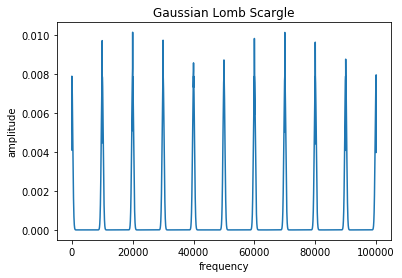

In [289]:
# Lomb-Scargle
# Gaussian function
x = np.linspace(0, L, res)
f = np.linspace(0.1,10**5,10**5)
gaus_fft_lomb = signal.lombscargle(x, gaus_array,f)
plt.plot(gaus_fft_lomb)
plt.title('Gaussian Lomb Scargle')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

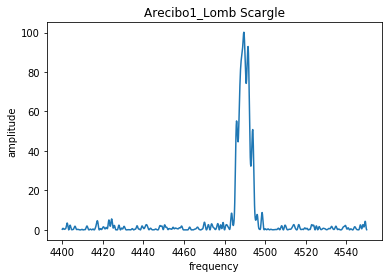

In [239]:
# Lomb Scargle 
# arecibo
f_arecibo = np.linspace(2*np.pi*4400/32768,2*np.pi*4550/32768,10**3)
time = time.astype('float64')
arecibo_fft_lomb = signal.lombscargle(time, data, f_arecibo)
f_graph = np.linspace(4400, 4550, 10**3)
plt.plot(f_graph, arecibo_fft_lomb)
plt.title('Arecibo1_Lomb Scargle')
plt.xlabel('frequency')
plt.ylabel('amplitude')
plt.show()

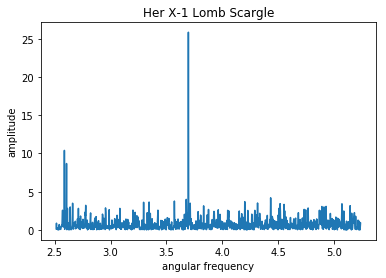

In [288]:
# Lomb Scargle 
# Her X-1
# Access data
url = "http://nesssi.cacr.caltech.edu/DataRelease/upload/result_web_file21Over.csv"
values = {}
req = urllib2.Request(url)
response = urllib2.urlopen(req)
the_page = response.read()
# snip out the wanted parts (time MJD and magnitude mag)
lines = the_page.split('\n')
lines.pop(0)
time_her_x1 = [] # time in units of days
mag = []
#print(lines[0].split(','))
for i in range(len(lines)):
    line = lines[i].split(',')
    if len(line) == 7:
        time_her_x1.append(float(line[5]))
        mag.append(float(line[1]))
L_her = max(time_her_x1) - min(time_her_x1)
#
#plt.plot(time_her_x1)
f_her = np.linspace(2*np.pi* 1/2.5,2*np.pi* 1/1.2, 1000)
time_her_x1 = np.asarray(time_her_x1)

mag = np.asarray(mag)
mag_lomb = signal.lombscargle(time_her_x1, mag-np.mean(mag), f_her)
# Standard lomb scargle is valid for a model with zero mean (with no constant term, since 
# sinusoids have a zero mean). Can approximate by substracting off the mean of the data set
plt.plot(f_her, mag_lomb)
plt.title('Her X-1 Lomb Scargle')
plt.xlabel('angular frequency')
plt.ylabel('amplitude')
plt.show()